<a href="https://colab.research.google.com/github/vedant574/iris-classifier-project/blob/main/Iris_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import metrics

# **Dataset Description**

In [ ]:
iris=pd.read_csv('Iris.csv')
iris=iris.drop(columns='Id')
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# **Data Visualisation**

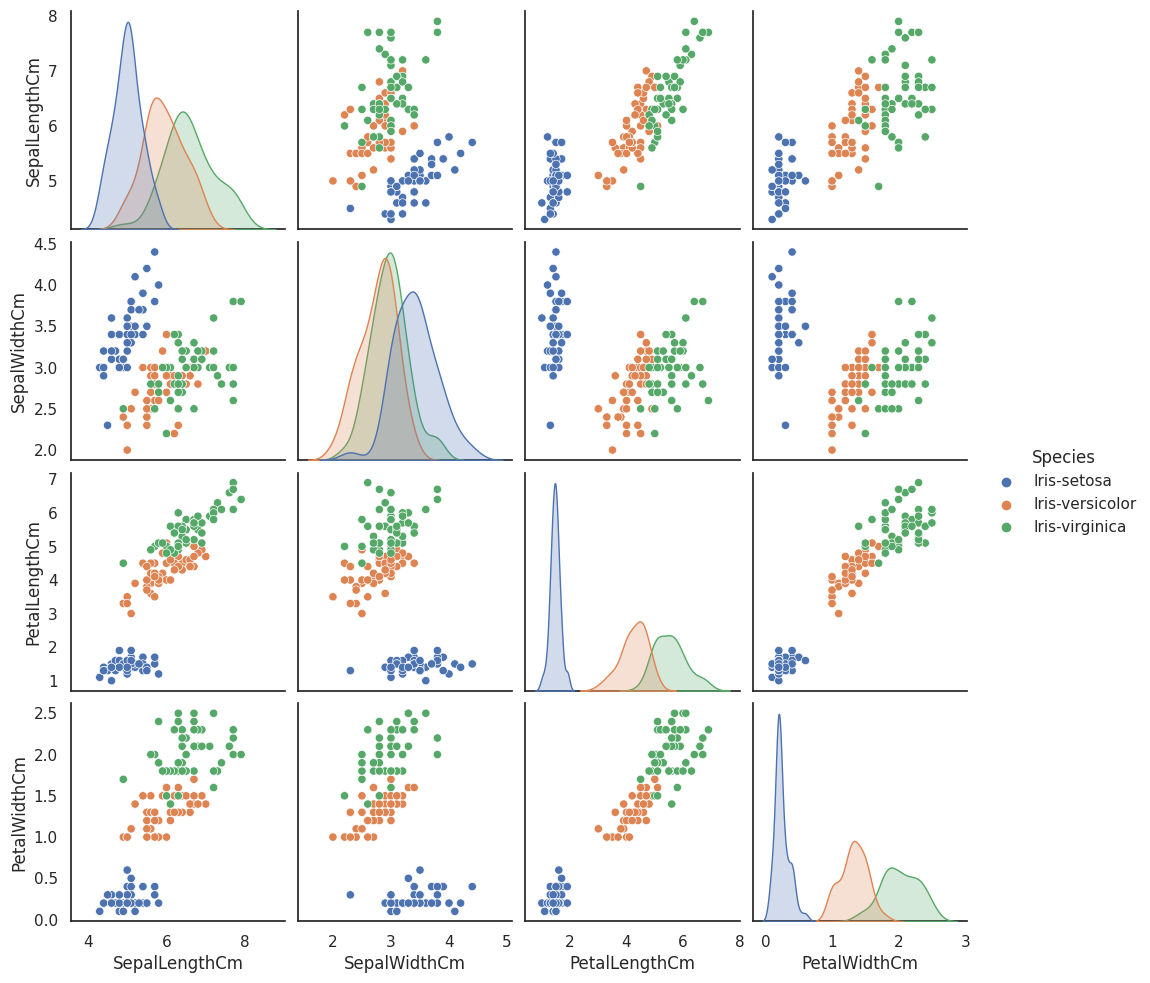

In [ ]:
sns.pairplot(iris, hue="Species")
plt.show()

<Axes: >

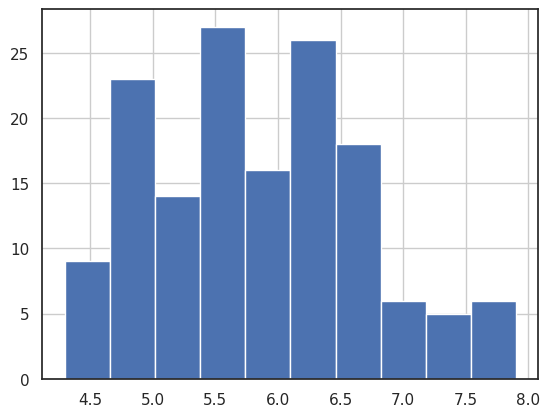

In [ ]:
iris['SepalLengthCm'].hist()

<Axes: >

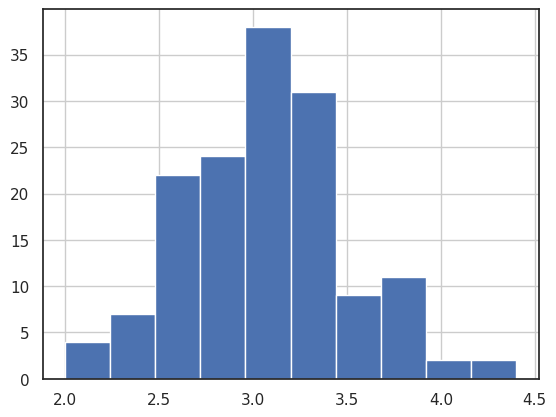

In [ ]:
iris['SepalWidthCm'].hist()

<Axes: >

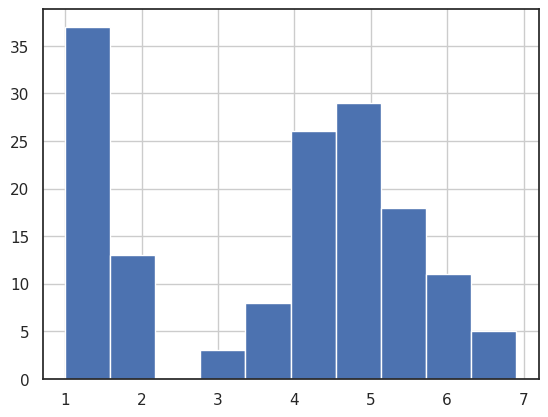

In [ ]:
iris['PetalLengthCm'].hist()

<Axes: >

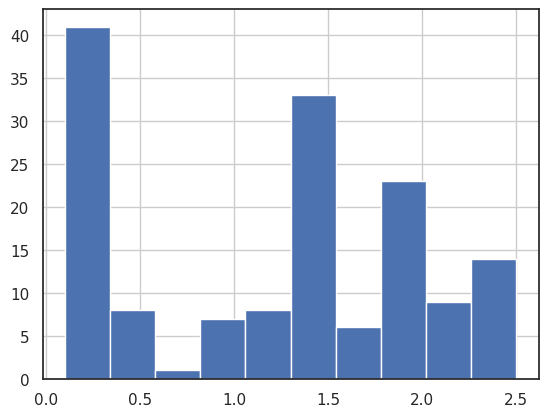

In [ ]:
iris['PetalWidthCm'].hist()

In [ ]:
relat=iris.corr()
relat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

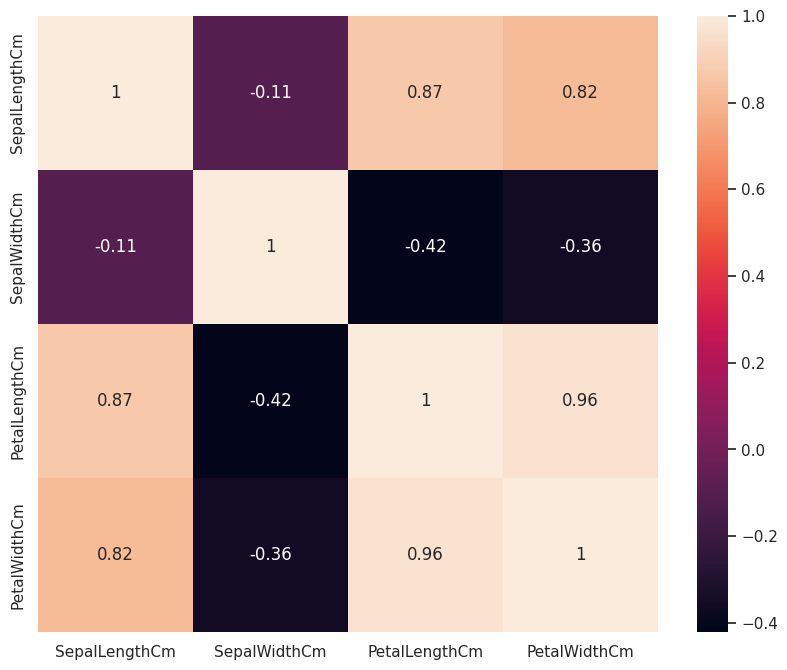

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(relat, annot=True, ax=ax)

# **Model Training**

In [ ]:
grp=LabelEncoder()
iris['Species']=grp.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
train,test=train_test_split(iris, test_size=0.2)

In [ ]:
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,6.3,2.5,5.0,1.9,2
98,5.1,2.5,3.0,1.1,1
56,6.3,3.3,4.7,1.6,1
66,5.6,3.0,4.5,1.5,1
57,4.9,2.4,3.3,1.0,1
...,...,...,...,...,...
49,5.0,3.3,1.4,0.2,0
124,6.7,3.3,5.7,2.1,2
14,5.8,4.0,1.2,0.2,0
23,5.1,3.3,1.7,0.5,0


In [ ]:
test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,5.6,2.7,4.2,1.3,1
144,6.7,3.3,5.7,2.5,2
92,5.8,2.6,4.0,1.2,1
18,5.7,3.8,1.7,0.3,0
93,5.0,2.3,3.3,1.0,1
41,4.5,2.3,1.3,0.3,0
1,4.9,3.0,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
29,4.7,3.2,1.6,0.2,0
99,5.7,2.8,4.1,1.3,1


In [ ]:
test_x=test.drop(columns=['Species'])
test_y=test['Species']
train_x=train.drop(columns=['Species'])
train_y=train['Species']
train_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
146,6.3,2.5,5.0,1.9
98,5.1,2.5,3.0,1.1
56,6.3,3.3,4.7,1.6
66,5.6,3.0,4.5,1.5
57,4.9,2.4,3.3,1.0
...,...,...,...,...
49,5.0,3.3,1.4,0.2
124,6.7,3.3,5.7,2.1
14,5.8,4.0,1.2,0.2
23,5.1,3.3,1.7,0.5


In [ ]:
test_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
94,5.6,2.7,4.2,1.3
144,6.7,3.3,5.7,2.5
92,5.8,2.6,4.0,1.2
18,5.7,3.8,1.7,0.3
93,5.0,2.3,3.3,1.0
41,4.5,2.3,1.3,0.3
1,4.9,3.0,1.4,0.2
48,5.3,3.7,1.5,0.2
29,4.7,3.2,1.6,0.2
99,5.7,2.8,4.1,1.3


In [ ]:
train_y

146    2
98     1
56     1
66     1
57     1
      ..
49     0
124    2
14     0
23     0
96     1
Name: Species, Length: 120, dtype: int64

In [ ]:
test_y

94     1
144    2
92     1
18     0
93     1
41     0
1      0
48     0
29     0
99     1
110    2
25     0
135    2
77     1
52     1
6      0
139    2
76     1
91     1
95     1
75     1
88     1
11     0
132    2
53     1
55     1
31     0
70     1
26     0
147    2
Name: Species, dtype: int64

# **LOGISTIC REGRESSION**


In [ ]:
algo=LogisticRegression()
algo.fit(train_x,train_y)
print("precision:",algo.score(test_x,test_y)*100)

precision: 93.33333333333333


In [ ]:
hope=test_y
result=algo.predict(test_x)
result

array([2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 0, 0, 0, 1, 0])

In [ ]:
print(metrics.classification_report(hope, result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print (metrics.confusion_matrix(hope, result))

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]


# **USING DECISION TREE CLASSIFIER**

In [ ]:
algo2=dtc()
algo2.fit(train_x,train_y)
result2=algo2.predict(test_x)
result2

array([1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 0, 2])

In [ ]:
print(metrics.classification_report(hope, result2))

              precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.25      0.33      0.29         9
           2       0.25      0.17      0.20        12

    accuracy                           0.27        30
   macro avg       0.27      0.28      0.27        30
weighted avg       0.26      0.27      0.26        30

